## 1.  Data Validation

The dataset contains **1500 rows and 8 columns** before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- booking_id: unique identifier of the booking without missing values, same as the description. No cleaning is needed.
- months_as_member: The number of months as this fitness club member, minimum 1 month, same as the description. No cleaning is needed.
- weight: the member's weight in kg, same as the description. 20 missing values were replace by overall average.
- days_before: numeric values. No missing values. Dtype converted to int.
- day_of_week: day of the week of the class. Fix the wrong week day names and changed dtype to category. No missing values.
- time: time of the day of the class, same as the description. No missing values. Change dtype to category.
- category: category of the fitness class. 13 missing values replace to "unknown". Dtype changed to category.
- attended: same as the description. No cleaning is needed.

After the data validation, the dataset contains **1500 rows and 8 columns** without missing values.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('colorblind')
sns.set_theme()
pd.set_option('display.expand_frame_repr', False)

In [168]:
df = pd.read_csv('fitness_class_2212.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [170]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [171]:
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [172]:
mean_weight = df['weight'].mean()
df['weight'].fillna(value=mean_weight, inplace=True)

df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [173]:
df['days_before'] = df['days_before'].str.strip(' days')

In [174]:
df['days_before'] = df['days_before'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


In [175]:
df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].str.replace('Monday', 'Mon')
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday', 'Wed')

df['day_of_week'] = df['day_of_week'].astype('category')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   object  
 6   category          1500 non-null   object  
 7   attended          1500 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 84.0+ KB


In [177]:
df['time'] = df['time'].astype('category')

In [178]:
df['category'] = df['category'].str.replace('-', 'Unknown')
df['category'] = df['category'].astype('category')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 63.8 KB


[Text(0, 0, '1046'), Text(0, 0, '454')]

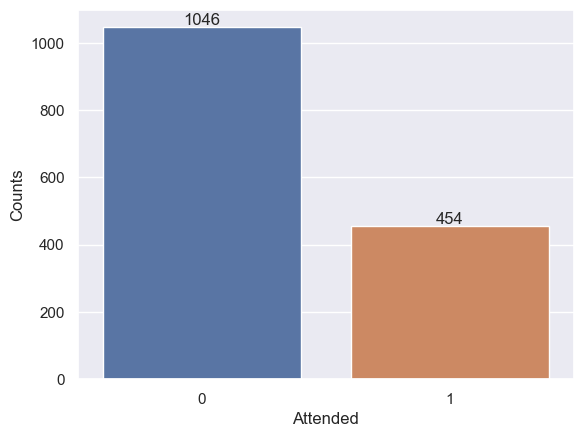

In [180]:
ax = sns.countplot(x='attended', data=df)
ax.set(xlabel='Attended', ylabel='Counts')
ax.bar_label(ax.containers[0])

[Text(0, 0, '25'),
 Text(0, 0, '110'),
 Text(0, 0, '213'),
 Text(0, 0, '62'),
 Text(0, 0, '2'),
 Text(0, 0, '42')]

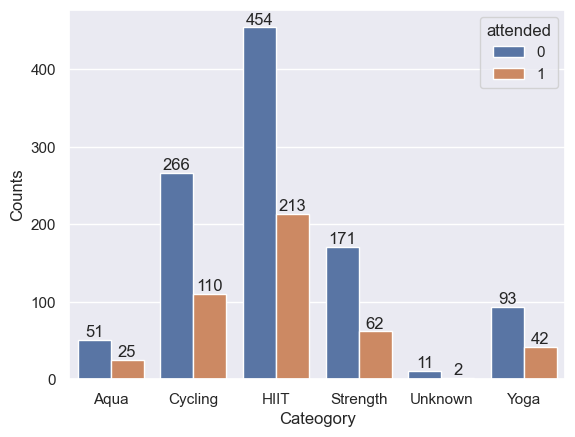

In [181]:
ax = sns.countplot(x='category', hue='attended', data=df)
ax.set(xlabel='Cateogory', ylabel='Counts')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

## 2. Create a visualization that shows how many bookings attended the class. Use the visualization to:

a. State which category of the variable attended has the most observations.

b. Explain whether the observations are balanced across categories of the variable attended

![Number of attended](attended.png)

Looking at the countplot of the attended variable, we can see that the majority did't attend.

![Number of attended by class category](attended_category.png)

If we plot the number of attended by class category, we see that the observations are balanced across the different classes categories. Roughly half of the people didn't attend.


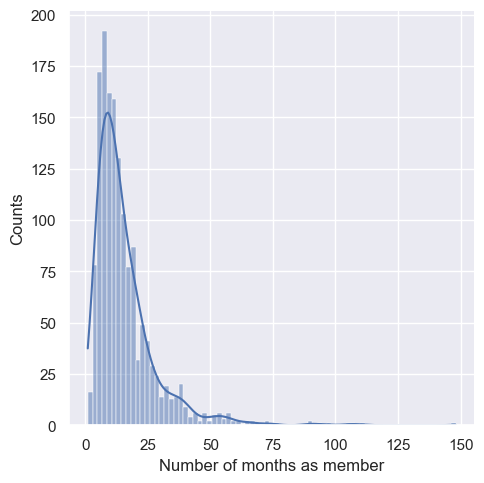

In [182]:
ax = sns.displot(x='months_as_member', data=df, kde=True)
ax.set(xlabel='Number of months as member', ylabel='Counts')

[Text(0.5, 0, 'Number of months as member')]

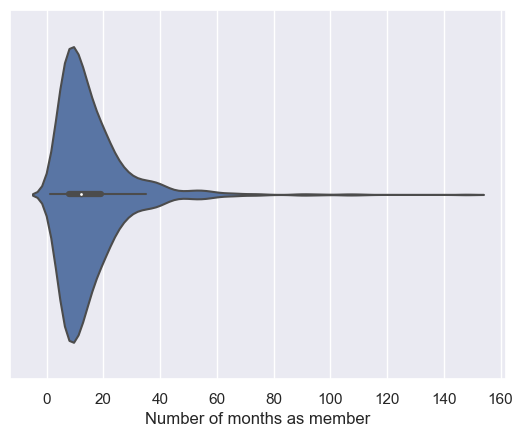

In [183]:
ax = sns.violinplot(x='months_as_member', data=df)
ax.set(xlabel='Number of months as member')

## 3.  Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

![Distribution of number of months as a member](months_as_member.png) ![Number of months as member -violin plot](months_violin.png)


Looking at the distributions of the months as a member, we can see that the distribution is righ skewed with some really old members.

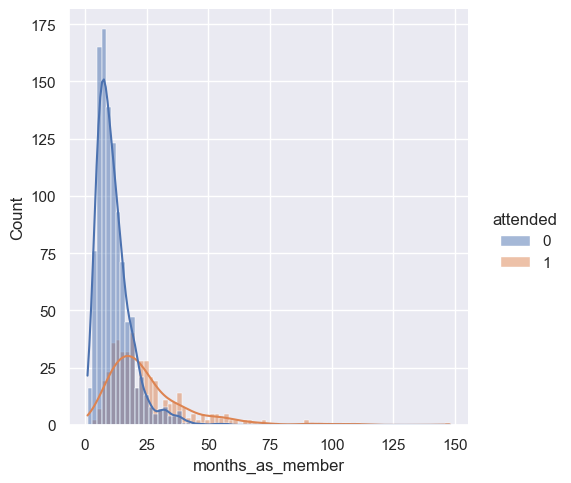

In [184]:
ax = sns.displot(x='months_as_member', hue='attended', data=df, kde=True)

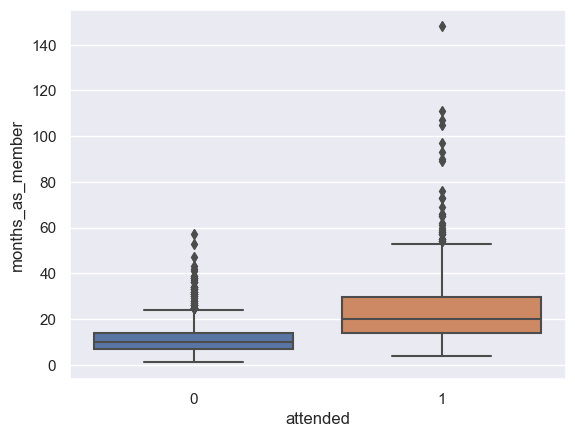

In [185]:
ax = sns.boxplot(x='attended', y='months_as_member', data=df)

## 4.  Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

![Months of members by attended](attended_months.png) 
![Number of months as member by attended -boxplot](attended_months_boxplot.png)


From the distributions between attendance and number of months as a member, we can see that older members tends to attend more to class. This can be confirmed by the boxplot, where the mean value of the months of the members who attend is higher.

## 5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/clustering).

It is a classification problem.

## 6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

df = df.drop('booking_id', axis=1)

df = pd.concat([df, pd.get_dummies(df['day_of_week'], drop_first=True)], axis=1).drop('day_of_week', axis=1)
df = pd.concat([df, pd.get_dummies(df['category'], drop_first=True)], axis=1).drop('category', axis=1)
df = pd.concat([df, pd.get_dummies(df['time'], drop_first=True)], axis=1).drop('time', axis=1)

df

,months_as_member,weight,days_before,attended,Mon,Sat,Sun,Thu,Tue,Wed,Cycling,HIIT,Strength,Unknown,Yoga,PM
0,17,79.56,8,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10,79.01,2,0,1,0,0,0,0,0,0,1,0,0,0,0
2,16,74.53,14,0,0,0,1,0,0,0,0,0,1,0,0,0
3,5,86.12,10,0,0,0,0,0,0,0,1,0,0,0,0,0
4,15,69.29,8,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,21,79.51,10,0,0,0,0,0,0,0,0,1,0,0,0,0
1496,29,89.55,2,0,1,0,0,0,0,0,0,0,1,0,0,0
1497,9,87.38,4,0,0,0,0,0,1,0,0,1,0,0,0,0
1498,34,68.64,14,0,0,0,1,0,0,0,0,0,0,0,0,0


In [187]:
X = df.drop('attended', axis=1)
y = df['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=888)

lr = LogisticRegression()

lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

model = GridSearchCV(lr, param_grid = lr_params, cv=5, verbose=True, n_jobs=-1)

model.fit(X_train, y_train)

best_model = model.best_estimator_

best_model.score(X_test, y_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.7706666666666667

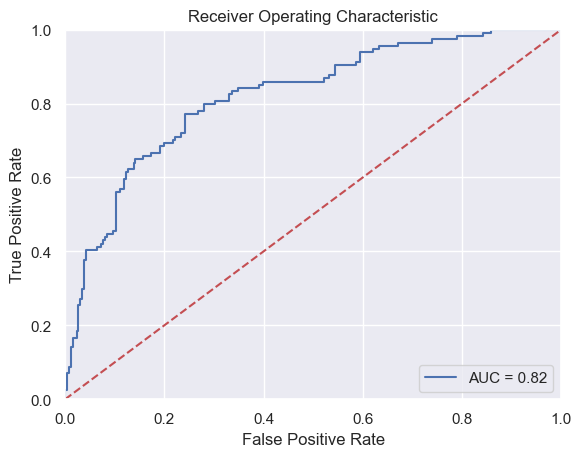

In [188]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = best_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

rf = RandomForestClassifier()

rf_params = {'n_estimators': list(range(10,101,10)), 'max_depth': [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18], 'criterion': ['gini', 'entropy', 'log_loss']}


model = GridSearchCV(rf, param_grid=rf_params, verbose=True, cv=5, n_jobs=-1)
                                  
model.fit(X_train, y_train)

best_model = model.best_estimator_

best_model.score(X_test, y_test)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


0.696

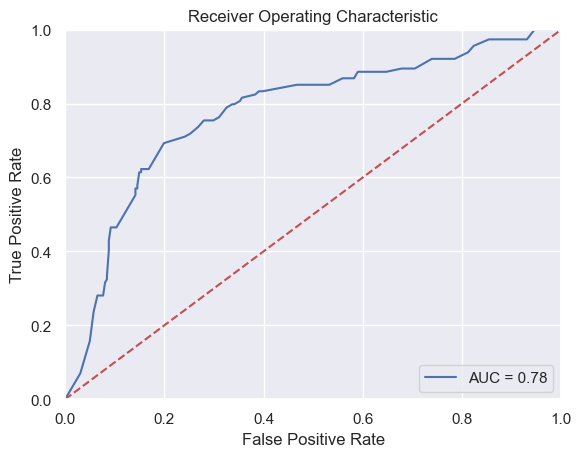

In [190]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = best_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8.  Explain why you chose the two models used in parts 6 and 7.

The classifier chosen in part 6 is one of the base linear models used for classification tasks. We could've used other linear classifiers like LinearSVC also. In part 7, I chose a non-linear classifier to see if the features were non-linear.


## 9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

After tuning some of the hyper-parameters of the two models used, we calculated the AUC score for both models, as see in the graphs above. Using this metric, we conclude that the linear classifier (**Logistic Regression**) is more suitable for this problem, as its score a higher AUC.

## 10. Explain which model performs better and why.

In this case, we found out that the linear classifier is more accurate, based on the AUC score of both models after tuning its hypter-parameters. The Logsitic Regression model is better because we have numeric and categorical variables. The Random Forest Classifier is a non-linear classifier and tends to perform better with categorical features.